In [1]:
import matplotlib.pyplot as plt
from matplotlib import ticker
import numpy as np
import scipy.io 
import sys
sys.path.append('/Users/yjzhu/Desktop/Solar/MyPy')
import juanfit
import importlib
importlib.reload(juanfit)
from juanfit import SpectrumFitSingle, SpectrumFitRow, gaussian
import cmcrameri.cm as cmcm
import sumerpy
importlib.reload(sumerpy)
from sumerpy import con_width_funct_4, radiometry

In [2]:
sumer_img = scipy.io.readsav("../../save/sumer_merg.sav")["int_merg"]
wvl_375 = np.linspace(0,1023,1024)*0.044790246422816475 + 745.655738274089
sumer_375_window = sumer_img[:,1024:2048]
sumer_375_window.shape
sumer_ycen = 1119.81
sumer_ycoord = np.linspace(sumer_ycen-299.2/2,sumer_ycen+299.2/2,300) - 5
np.set_printoptions(precision=2)

/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  
/anaconda3/lib/python3.7/site-packages/matplotlib/colors.py:620: RuntimeWarning: overflow encountered in multiply
  xa *= self.N


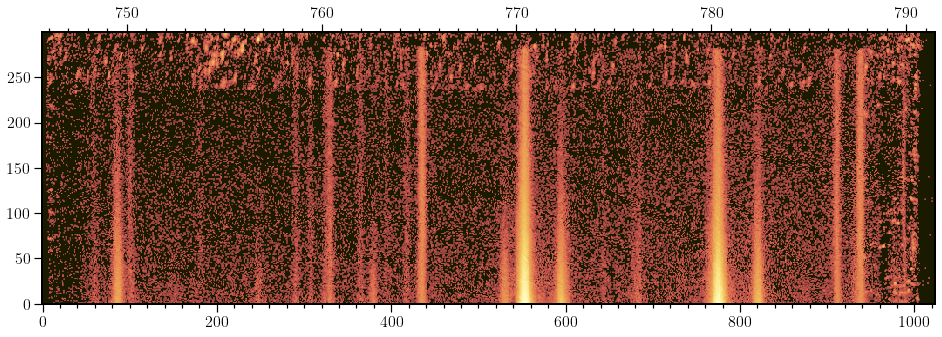

In [3]:
fig, ax = plt.subplots(figsize=(16,5))
ax.pcolormesh(np.arange(1024),np.arange(299,-1,-1),np.nan_to_num(np.log10(sumer_375_window),nan=-np.inf),
                  cmap=cmcm.lajolla_r,shading="auto",vmin=-5)

ax_wvl = ax.twiny()
ax_wvl.set_xlim(wvl_375[0],wvl_375[-1])
ax.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
ax_wvl.xaxis.set_minor_locator(ticker.AutoMinorLocator(10))
for ax_ in (ax, ax_wvl):
    ax_.tick_params(labelsize=16)
    ax_.tick_params(which="major",width=1.2,length=8)
    ax_.tick_params(which="minor",width=1.2,length=4)

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [223.28]


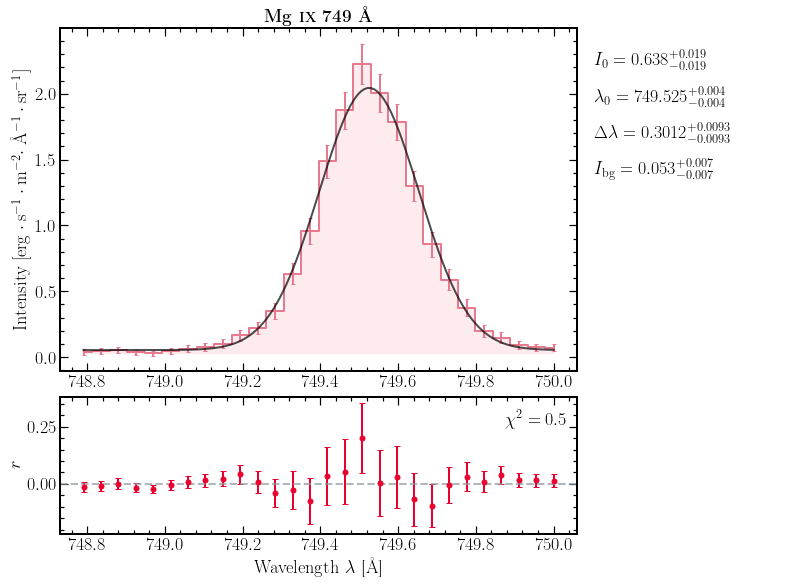

In [4]:
MgIX_749_slice = (70,98)
wvl_MgIX_749 = wvl_375[MgIX_749_slice[0]:MgIX_749_slice[1]]
radiometry_MgIX_749 = radiometry(1,wvl_MgIX_749,1,np.ones_like(wvl_MgIX_749),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_MgIX_749 = np.average(sumer_375_window[-30:,MgIX_749_slice[0]:MgIX_749_slice[1]],axis=0)*radiometry_MgIX_749
err_MgIX_749 = np.sqrt(np.sum(300*sumer_375_window[-30:,MgIX_749_slice[0]:MgIX_749_slice[1]],
                        axis=0))/30/300*radiometry_MgIX_749

MgIX_749_fit_model = SpectrumFitSingle(data=int_MgIX_749,wvl=wvl_MgIX_749,err=err_MgIX_749,
                                      same_width=False,line_number=1,line_wvl_init=[749.5],
                                      int_max_init=[1],fwhm_init=[0.3])
#MgIX_749_fit_model.plot(plot_fit=False,plot_params=False)
MgIX_749_fit_model.run_HahnMC(n_chain=10000)
MgIX_749_fit_model.plot(plot_title=r"\textbf{Mg \textsc{ix} 749 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgIX_749_fit_model.line_wvl_fit_hmc,1,MgIX_749_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


<AxesSubplot:ylabel='FWHM $\\Delta \\lambda$'>

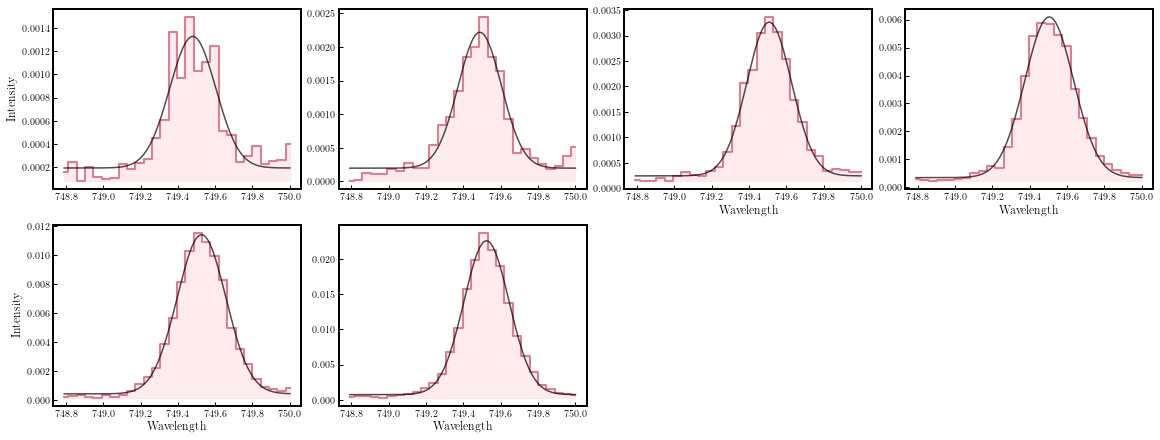

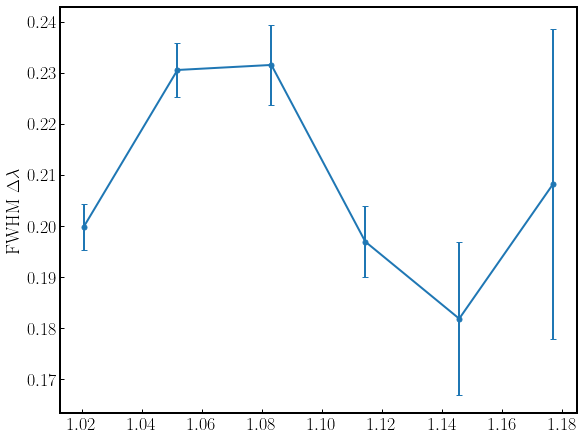

In [5]:
int_MgIX_749_row = np.average(sumer_375_window[-180:,MgIX_749_slice[0]:MgIX_749_slice[1]].reshape(-1,30,MgIX_749_slice[1]-MgIX_749_slice[0]),axis=1)

MgIX_749_fit_row_model = SpectrumFitRow(data=int_MgIX_749_row,wvl=wvl_MgIX_749,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[749.5],
                                      int_max_init=[0.02],fwhm_init=[0.3])
MgIX_749_fit_row_model.run_lse()
MgIX_749_fit_row_model.plot_fit()
MgIX_749_fit_row_model.fwhm_fit = con_width_funct_4(1,MgIX_749_fit_row_model.line_wvl_fit,1, MgIX_749_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
MgIX_749_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:180].reshape(-1,30),axis=1))/960)

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [162.64]


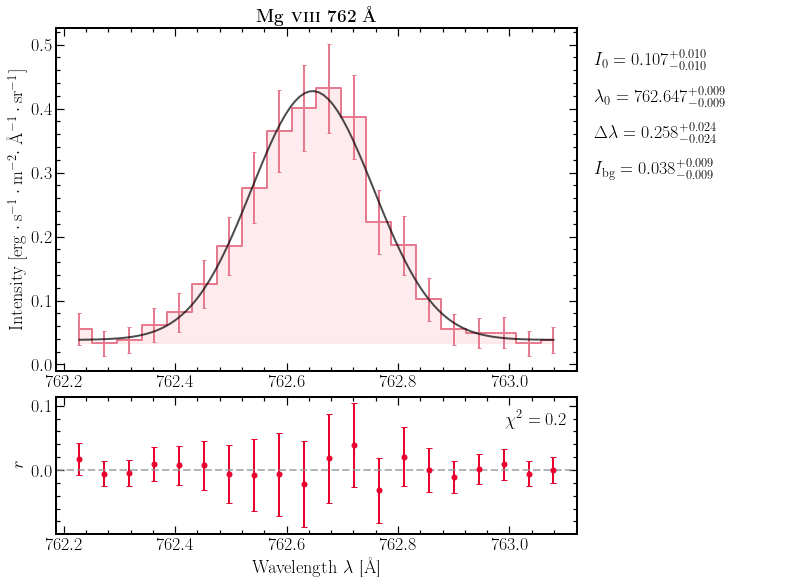

In [6]:
MgVIII_762_slice = (370,390)
wvl_MgVIII_762 = wvl_375[MgVIII_762_slice[0]:MgVIII_762_slice[1]]
radiometry_MgVIII_762 = radiometry(1,wvl_MgVIII_762,1,np.ones_like(wvl_MgVIII_762),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_MgVIII_762 = np.average(sumer_375_window[-30:,MgVIII_762_slice[0]:MgVIII_762_slice[1]],axis=0)*radiometry_MgVIII_762
err_MgVIII_762 = np.sqrt(np.sum(300*sumer_375_window[-30:,MgVIII_762_slice[0]:MgVIII_762_slice[1]],
                        axis=0))/30/300*radiometry_MgVIII_762

MgVIII_762_fit_model = SpectrumFitSingle(data=int_MgVIII_762,wvl=wvl_MgVIII_762,err=err_MgVIII_762,
                                      same_width=False,line_number=1,line_wvl_init=[762.7],
                                      int_max_init=[0.3],fwhm_init=[0.3])
#MgVIII_762_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_762_fit_model.run_HahnMC(n_chain=10000)
MgVIII_762_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 762 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_762_fit_model.line_wvl_fit_hmc,1,MgVIII_762_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [228.18]


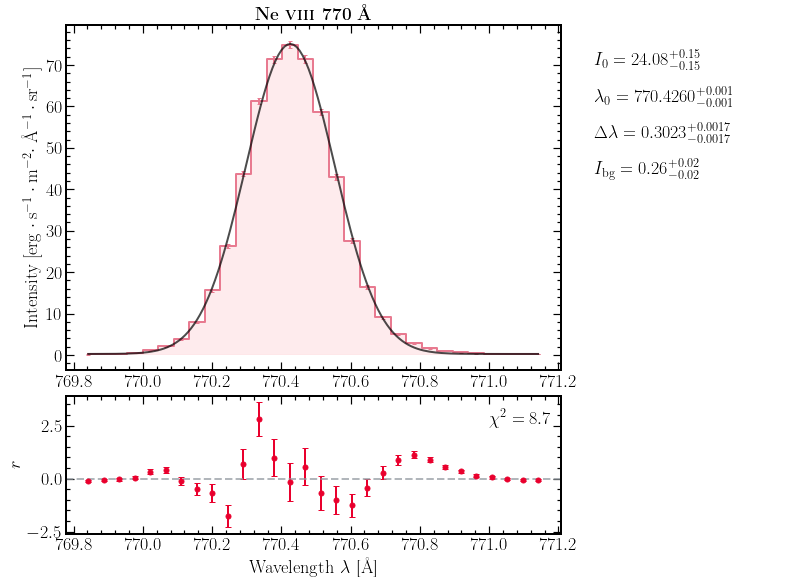

In [7]:
NeVIII_770_slice = (540,570)
wvl_NeVIII_770 = wvl_375[NeVIII_770_slice[0]:NeVIII_770_slice[1]]
radiometry_NeVIII_770 = radiometry(1,wvl_NeVIII_770,1,np.ones_like(wvl_NeVIII_770),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_NeVIII_770 = np.average(sumer_375_window[-30:,NeVIII_770_slice[0]:NeVIII_770_slice[1]],axis=0)*radiometry_NeVIII_770
err_NeVIII_770 = np.sqrt(np.sum(300*sumer_375_window[-30:,NeVIII_770_slice[0]:NeVIII_770_slice[1]],
                        axis=0))/30/300*radiometry_NeVIII_770

NeVIII_770_fit_model = SpectrumFitSingle(data=int_NeVIII_770,wvl=wvl_NeVIII_770,err=err_NeVIII_770,
                                      same_width=False,line_number=1,line_wvl_init=[770.4],
                                      int_max_init=[70],fwhm_init=[0.3])
#NeVIII_770_fit_model.plot(plot_fit=False,plot_params=False)
NeVIII_770_fit_model.run_HahnMC(n_chain=10000)
NeVIII_770_fit_model.plot(plot_title=r"\textbf{Ne \textsc{viii} 770 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NeVIII_770_fit_model.line_wvl_fit_hmc,1,NeVIII_770_fit_model.fwhm_fit_hmc*1000,DET_B=True))

FWHM after removing instrumental broadening:  [199.48 411.5 ]


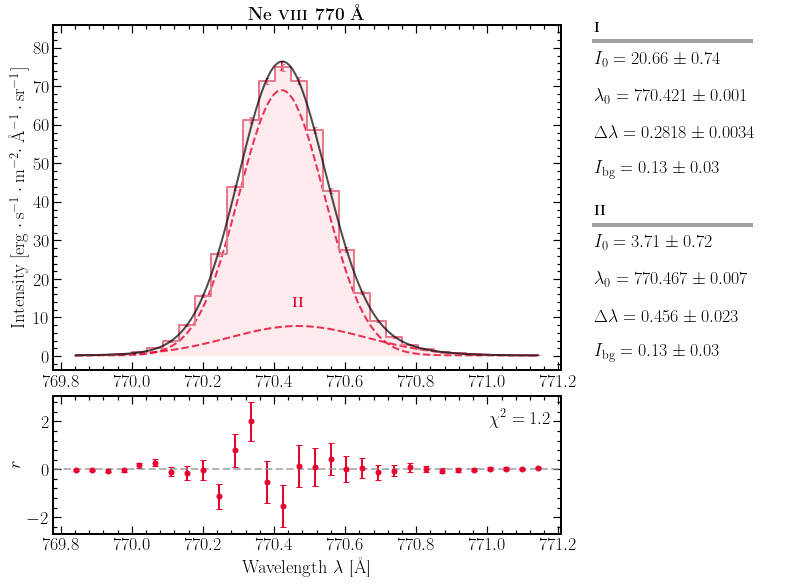

In [8]:
NeVIII_770_fit_model = SpectrumFitSingle(data=int_NeVIII_770,wvl=wvl_NeVIII_770,err=err_NeVIII_770,
                                      same_width=False,line_number=2,line_wvl_init=[770.4,770.4],
                                      int_max_init=[70,10],fwhm_init=[0.3,0.6])
#NeVIII_770_fit_model.plot(plot_fit=False,plot_params=False)
NeVIII_770_fit_model.run_lse()
NeVIII_770_fit_model.plot(plot_title=r"\textbf{Ne \textsc{viii} 770 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NeVIII_770_fit_model.line_wvl_fit,1,NeVIII_770_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


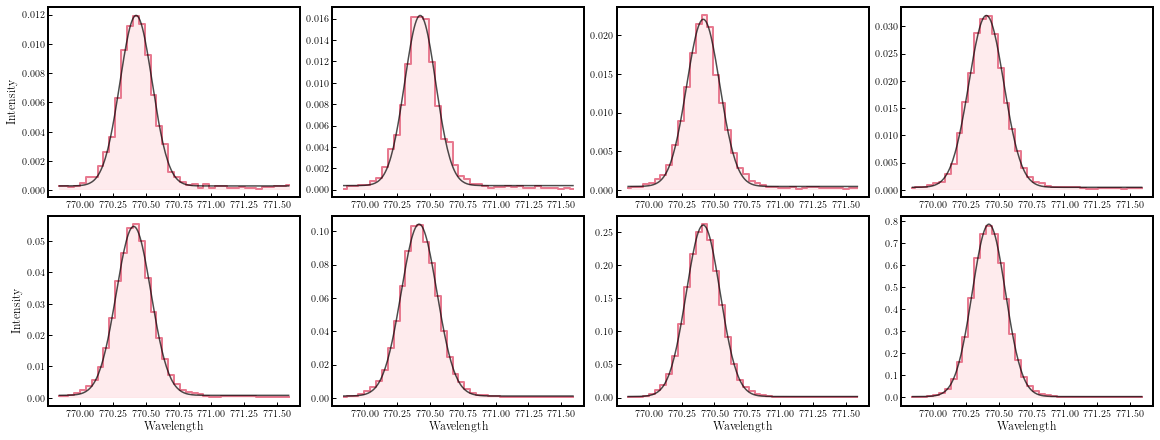

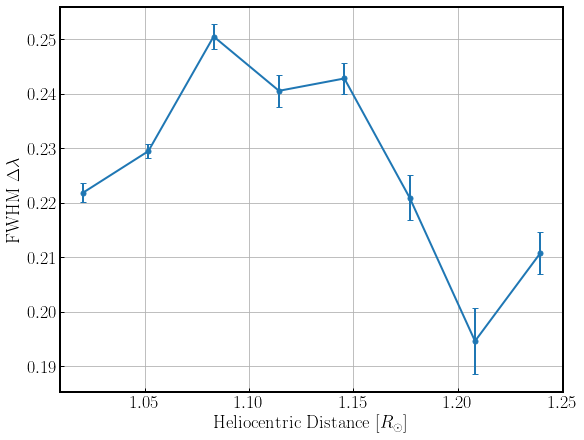

In [9]:
NeVIII_770_slice = (540,580)
wvl_NeVIII_770 = wvl_375[NeVIII_770_slice[0]:NeVIII_770_slice[1]]
int_NeVIII_770_row = np.average(sumer_375_window[-240:,NeVIII_770_slice[0]:NeVIII_770_slice[1]].reshape(-1,30,NeVIII_770_slice[1]-NeVIII_770_slice[0]),axis=1)

NeVIII_770_fit_row_model = SpectrumFitRow(data=int_NeVIII_770_row,wvl=wvl_NeVIII_770,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[770.4],
                                      int_max_init=[0.8],fwhm_init=[0.3])
NeVIII_770_fit_row_model.run_lse()
NeVIII_770_fit_row_model.plot_fit()
NeVIII_770_fit_row_model.fwhm_fit = con_width_funct_4(1,NeVIII_770_fit_row_model.line_wvl_fit,1, NeVIII_770_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = NeVIII_770_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960,
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [231.9]


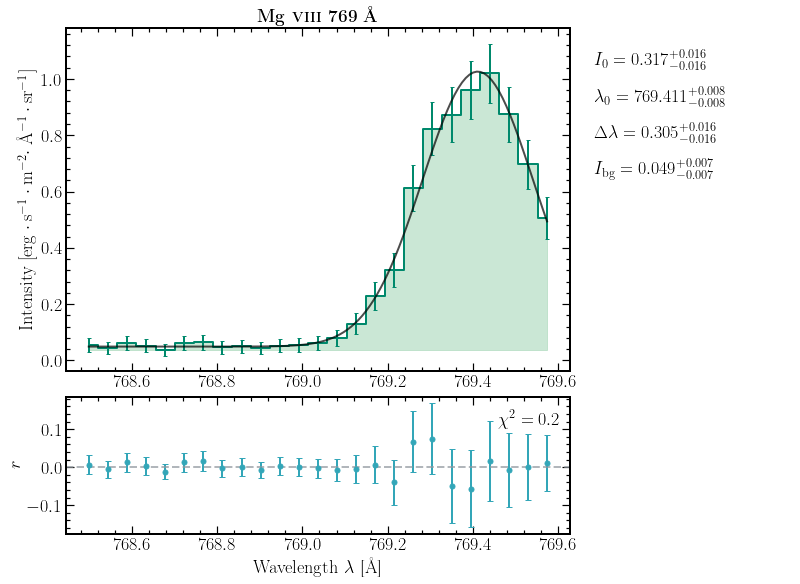

In [10]:
MgVIII_769_slice = (510,535)
wvl_MgVIII_769 = wvl_375[MgVIII_769_slice[0]:MgVIII_769_slice[1]]
radiometry_MgVIII_769 = radiometry(1,wvl_MgVIII_769,1,np.ones_like(wvl_MgVIII_769),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_MgVIII_769 = np.average(sumer_375_window[-30:,MgVIII_769_slice[0]:MgVIII_769_slice[1]],axis=0)*radiometry_MgVIII_769
err_MgVIII_769 = np.sqrt(np.sum(300*sumer_375_window[-30:,MgVIII_769_slice[0]:MgVIII_769_slice[1]],
                        axis=0))/30/300*radiometry_MgVIII_769
MgVIII_769_fit_model = SpectrumFitSingle(data=int_MgVIII_769,wvl=wvl_MgVIII_769,err=err_MgVIII_769,
                                      same_width=False,line_number=1,line_wvl_init=[769.3],
                                      int_max_init=[1],fwhm_init=[0.3])
#MgVIII_769_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_769_fit_model.run_HahnMC(n_chain=10000)
MgVIII_769_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 769 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                                color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_769_fit_model.line_wvl_fit_hmc,1,MgVIII_769_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [223.44]


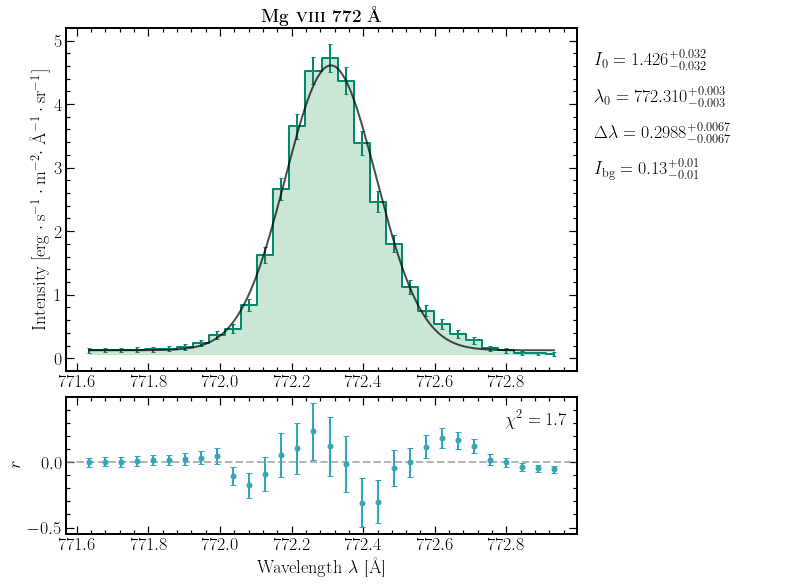

In [11]:
MgVIII_772_slice = (580,610)
wvl_MgVIII_772 = wvl_375[MgVIII_772_slice[0]:MgVIII_772_slice[1]]
radiometry_MgVIII_772 = radiometry(1,wvl_MgVIII_772,1,np.ones_like(wvl_MgVIII_772),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1e3
int_MgVIII_772 = np.average(sumer_375_window[-30:,MgVIII_772_slice[0]:MgVIII_772_slice[1]],axis=0)*radiometry_MgVIII_772
err_MgVIII_772 = np.sqrt(np.sum(300*sumer_375_window[-30:,MgVIII_772_slice[0]:MgVIII_772_slice[1]],
                        axis=0))/30/300*radiometry_MgVIII_772

MgVIII_772_fit_model = SpectrumFitSingle(data=int_MgVIII_772,wvl=wvl_MgVIII_772,err=err_MgVIII_772,
                                      same_width=False,line_number=1,line_wvl_init=[772.3],
                                      int_max_init=[2],fwhm_init=[0.3])
#MgVIII_772_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_772_fit_model.run_HahnMC(n_chain=10000)
MgVIII_772_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 772 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                                color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_772_fit_model.line_wvl_fit_hmc,1,MgVIII_772_fit_model.fwhm_fit_hmc*1000,DET_B=True))

FWHM after removing instrumental broadening:  [197.22   0.  ]


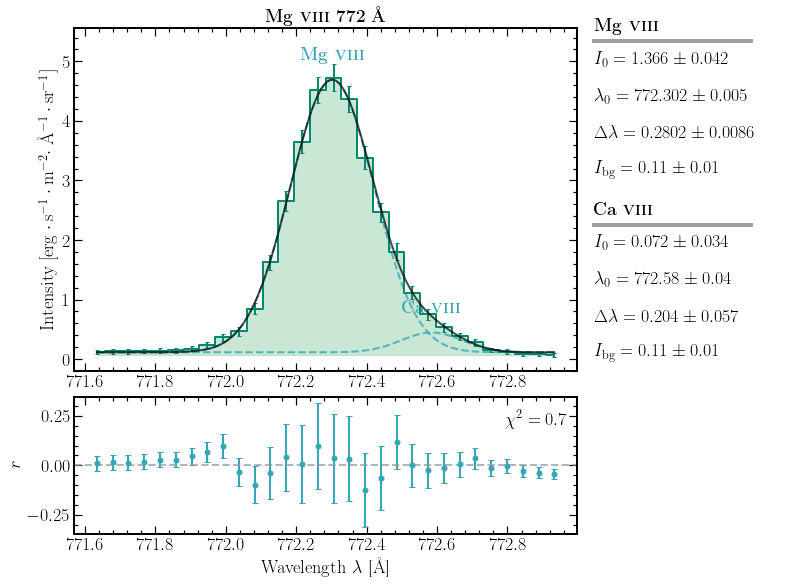

In [12]:
MgVIII_772_fit_model = SpectrumFitSingle(data=int_MgVIII_772,wvl=wvl_MgVIII_772,err=err_MgVIII_772,
                                      same_width=False,line_number=2,line_wvl_init=[772.3,772.5],
                                      int_max_init=[5,1],fwhm_init=[0.3,0.3])
#MgVIII_772_fit_model.plot(plot_fit=False,plot_params=False)
#MgVIII_772_fit_model.run_HahnMC(n_chain=10000)
MgVIII_772_fit_model.run_lse()
MgVIII_772_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 772 \mbox{\AA}}",
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                                 line_caption=[r"\textbf{Mg \textsc{viii}}",r"\textbf{Ca \textsc{viii}}"],
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                                color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_772_fit_model.line_wvl_fit,1,MgVIII_772_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [299.14]


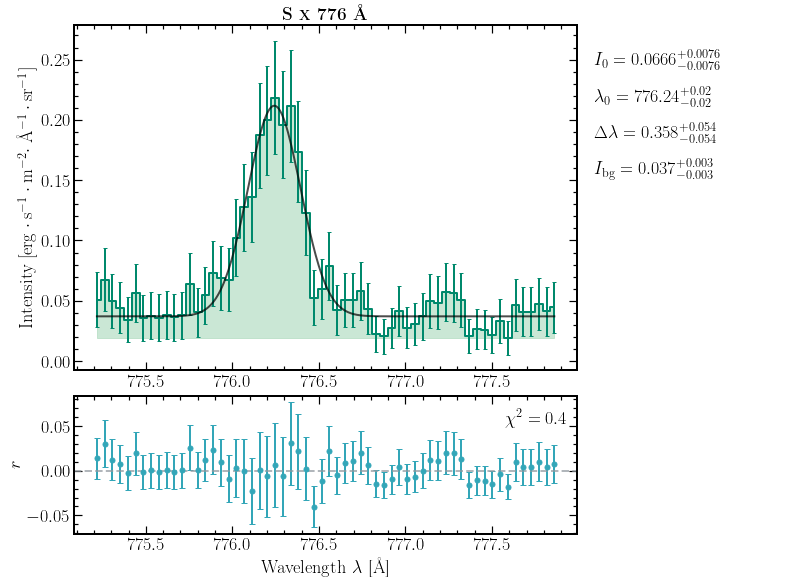

In [13]:
SX_776_slice = (660,720)
wvl_SX_776 = wvl_375[SX_776_slice[0]:SX_776_slice[1]]
radiometry_SX_776 = radiometry(1,wvl_SX_776,1,np.ones_like(wvl_SX_776),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_SX_776 = np.average(sumer_375_window[-30:,SX_776_slice[0]:SX_776_slice[1]],axis=0)*radiometry_SX_776
err_SX_776 = np.sqrt(np.sum(300*sumer_375_window[-30:,SX_776_slice[0]:SX_776_slice[1]],
                        axis=0))/30/300*radiometry_SX_776

SX_776_fit_model = SpectrumFitSingle(data=int_SX_776,wvl=wvl_SX_776,err=err_SX_776,
                                      same_width=False,line_number=1,line_wvl_init=[776.2],
                                      int_max_init=[1],fwhm_init=[0.3])
#SX_776_fit_model.plot(plot_fit=False,plot_params=False)
SX_776_fit_model.run_HahnMC(n_chain=10000)
SX_776_fit_model.plot(plot_title=r"\textbf{S \textsc{x} 776 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$",
                                color_style="Green")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,SX_776_fit_model.line_wvl_fit_hmc,1,SX_776_fit_model.fwhm_fit_hmc*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [239.76]


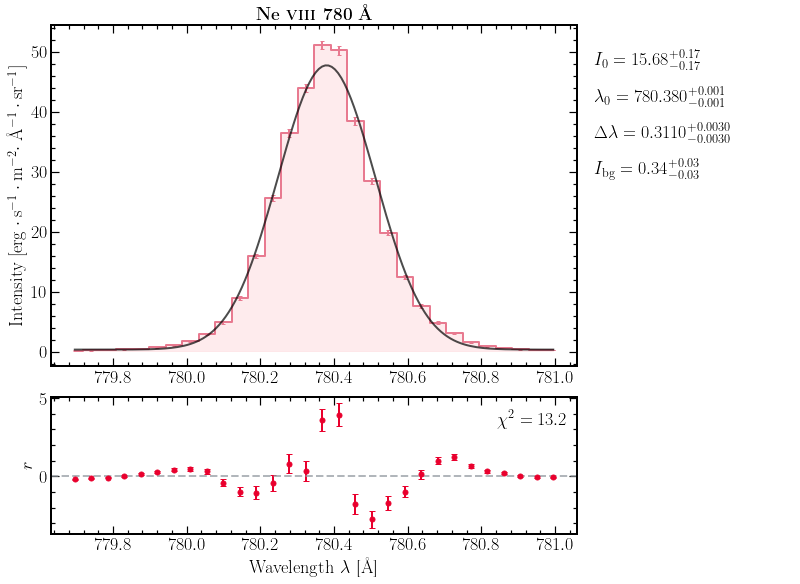

In [14]:
NeVIII_780_slice = (760,790)
wvl_NeVIII_780 = wvl_375[NeVIII_780_slice[0]:NeVIII_780_slice[1]]
radiometry_NeVIII_780 = radiometry(1,wvl_NeVIII_780,1,np.ones_like(wvl_NeVIII_780),bare=True,kbr=False,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3

int_NeVIII_780 = np.average(sumer_375_window[-30:,NeVIII_780_slice[0]:NeVIII_780_slice[1]],axis=0)*radiometry_NeVIII_780
err_NeVIII_780 = np.sqrt(np.sum(300*sumer_375_window[-30:,NeVIII_780_slice[0]:NeVIII_780_slice[1]],
                        axis=0))/30/300*radiometry_NeVIII_780
NeVIII_780_fit_model = SpectrumFitSingle(data=int_NeVIII_780,wvl=wvl_NeVIII_780,err=err_NeVIII_780,
                                      same_width=False,line_number=1,line_wvl_init=[780.4],
                                      int_max_init=[50],fwhm_init=[0.3])
#NeVIII_780_fit_model.plot(plot_fit=False,plot_params=False)
NeVIII_780_fit_model.run_HahnMC(n_chain=10000)
NeVIII_780_fit_model.plot(plot_title=r"\textbf{Ne \textsc{viii} 780 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NeVIII_780_fit_model.line_wvl_fit_hmc,1,NeVIII_780_fit_model.fwhm_fit_hmc*1000,DET_B=True))

FWHM after removing instrumental broadening:  [133.95 354.23]


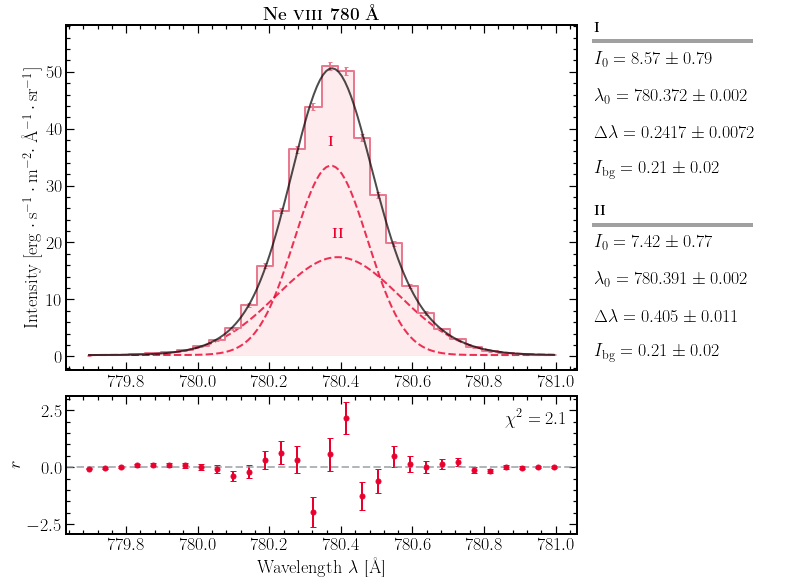

In [15]:
NeVIII_780_fit_model = SpectrumFitSingle(data=int_NeVIII_780,wvl=wvl_NeVIII_780,err=err_NeVIII_780,
                                      same_width=False,line_number=2,line_wvl_init=[780.4,780.4],
                                      int_max_init=[50,5],fwhm_init=[0.3,1])
#NeVIII_780_fit_model.plot(plot_fit=False,plot_params=False)
NeVIII_780_fit_model.run_lse()
NeVIII_780_fit_model.plot(plot_title=r"\textbf{Ne \textsc{viii} 780 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,NeVIII_780_fit_model.line_wvl_fit,1,NeVIII_780_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:475: UserWarning: Use custom function in the fitting. Will not plot fitted parameters.
  warn("Use custom function in the fitting. Will not plot fitted parameters.")


fitted FWHM: 0.291 +/- 0.002  0.620 +/- 0.040
fitted wavelength: 780.379 +/- 0.001  780.395 +/- 0.006


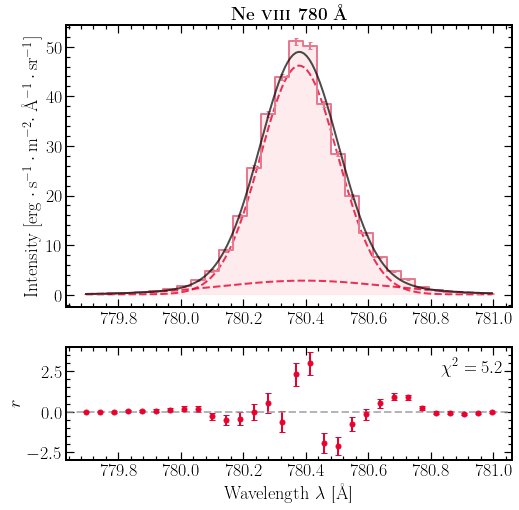

In [16]:
def NeVIII_780_double_gaussian_func(wvl,int1,wvl1,wvl2,fwhm1,fwhm2,int_cont):
    return gaussian(wvl,wvl1,int1,fwhm1) + gaussian(wvl,wvl2,0.494*3.71,fwhm2) + int_cont

NeVIII_780_fit_model = SpectrumFitSingle(data=int_NeVIII_780,wvl=wvl_NeVIII_780,err=err_NeVIII_780,
                                      custom_func=NeVIII_780_double_gaussian_func,custom_init=[50,780.39,780.39,0.24,0.4,0.21])
#NeVIII_780_fit_model.plot(plot_fit=False,plot_params=False)
NeVIII_780_fit_model.run_lse()
ax = NeVIII_780_fit_model.plot(plot_title=r"\textbf{Ne \textsc{viii} 780 \mbox{\AA}}",plot_hmc=False,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                               ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
ax.plot(NeVIII_780_fit_model.wvl_plot,gaussian(NeVIII_780_fit_model.wvl_plot,NeVIII_780_fit_model.custom_fit[1],
        NeVIII_780_fit_model.custom_fit[0],NeVIII_780_fit_model.custom_fit[3])+NeVIII_780_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
ax.plot(NeVIII_780_fit_model.wvl_plot,gaussian(NeVIII_780_fit_model.wvl_plot,NeVIII_780_fit_model.custom_fit[2],
        0.494*3.71,NeVIII_780_fit_model.custom_fit[4])+NeVIII_780_fit_model.custom_fit[-1],
        lw=2,alpha=0.8,ls="--",color="#E9002D")
print("fitted FWHM: {:.3f} +/- {:.3f}  {:.3f} +/- {:.3f}".format(NeVIII_780_fit_model.custom_fit[3],
                                                                NeVIII_780_fit_model.custom_err[3],
                                                                NeVIII_780_fit_model.custom_fit[4],
                                                                NeVIII_780_fit_model.custom_err[4]))

print("fitted wavelength: {:.3f} +/- {:.3f}  {:.3f} +/- {:.3f}".format(NeVIII_780_fit_model.custom_fit[1],
                                                                NeVIII_780_fit_model.custom_err[1],
                                                                NeVIII_780_fit_model.custom_fit[2],
                                                                NeVIII_780_fit_model.custom_err[2]))
# print("FWHM after removing instrumental broadening: ",
# con_width_funct_4(1,NeVIII_780_fit_model.line_wvl_fit,1,NeVIII_780_fit_model.fwhm_fit*1000,DET_B=True))

/Users/yjzhu/Desktop/Solar/MyPy/juanfit.py:202: UserWarning: No input errors, absolute_sigma=False will be used in the Chi2 fitting.
  warn("No input errors, absolute_sigma=False will be used in the Chi2 fitting.")
No handles with labels found to put in legend.


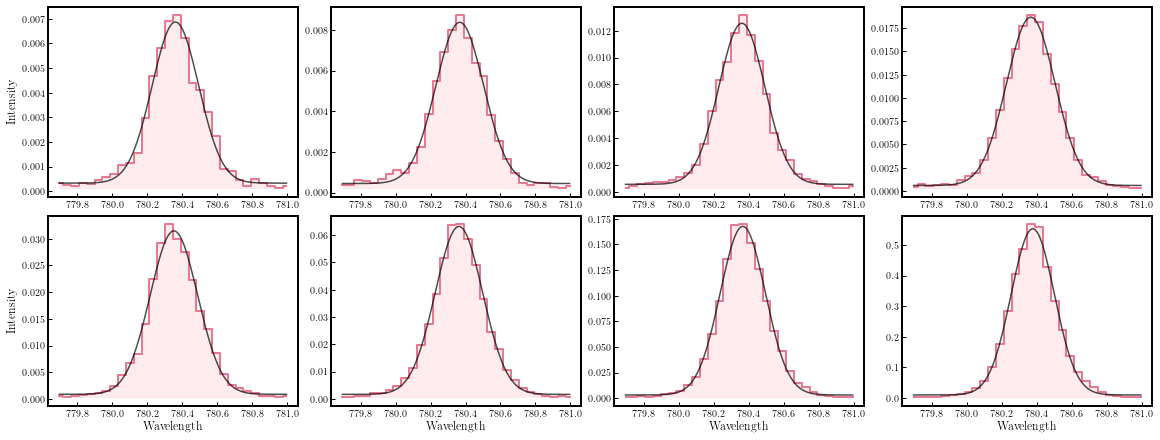

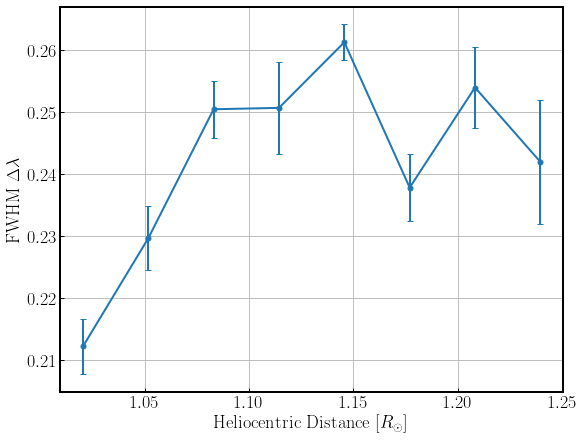

In [17]:
int_NeVIII_780_row = np.average(sumer_375_window[-240:,NeVIII_780_slice[0]:NeVIII_780_slice[1]].reshape(-1,30,NeVIII_780_slice[1]-NeVIII_780_slice[0]),axis=1)

NeVIII_780_fit_row_model = SpectrumFitRow(data=int_NeVIII_780_row,wvl=wvl_NeVIII_780,err=None,
                                      same_width=False,line_number=1,line_wvl_init=[780.4],
                                      int_max_init=[0.5],fwhm_init=[0.3])
NeVIII_780_fit_row_model.run_lse()
NeVIII_780_fit_row_model.plot_fit()
NeVIII_780_fit_row_model.fwhm_fit = con_width_funct_4(1,NeVIII_780_fit_row_model.line_wvl_fit,1, NeVIII_780_fit_row_model.fwhm_fit*1000,DET_B=True)/1000
ax = NeVIII_780_fit_row_model.plot_variation(xdata=np.flip(np.average(sumer_ycoord[:240].reshape(-1,30),axis=1))/960,
                                            xlabel=r"Heliocentric Distance $\left[R_\odot \right]$")
ax.grid("on")

/Users/yjzhu/Desktop/Solar/MyPy/sumerpy.py:457: UserWarning: No test phase set by default.
  warn("No test phase set by default.")


FWHM after removing instrumental broadening:  [222.88]


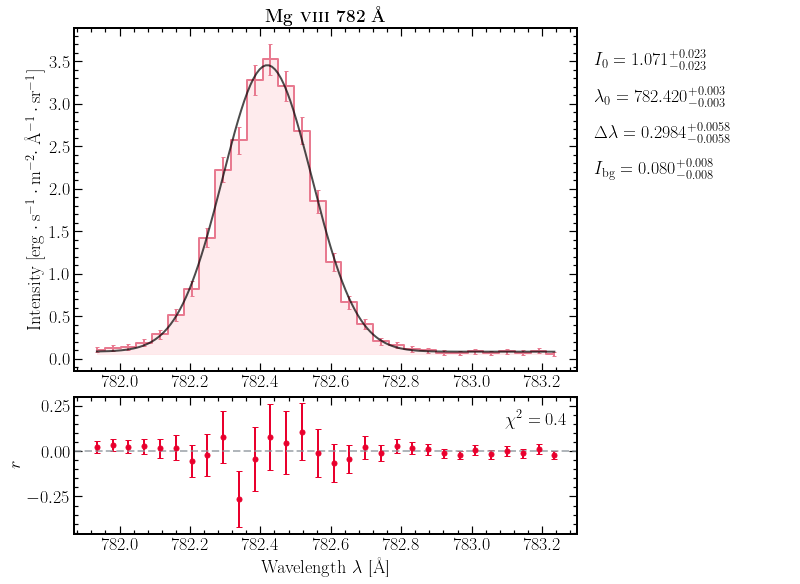

In [18]:
MgVIII_782_slice = (810,840)
wvl_MgVIII_782 = wvl_375[MgVIII_782_slice[0]:MgVIII_782_slice[1]]
radiometry_MgVIII_782 = radiometry(1,wvl_MgVIII_782,1,np.ones_like(wvl_MgVIII_782),bare=False,kbr=True,photons=False,watts=True,det_a=False,
                                det_b=True,joint=False,separate=True)*1.e3
int_MgVIII_782 = np.average(sumer_375_window[-30:,MgVIII_782_slice[0]:MgVIII_782_slice[1]],axis=0)*radiometry_MgVIII_782
err_MgVIII_782 = np.sqrt(np.sum(300*sumer_375_window[-30:,MgVIII_782_slice[0]:MgVIII_782_slice[1]],
                        axis=0))/30/300*radiometry_MgVIII_782

MgVIII_782_fit_model = SpectrumFitSingle(data=int_MgVIII_782,wvl=wvl_MgVIII_782,err=err_MgVIII_782,
                                      same_width=False,line_number=1,line_wvl_init=[782.4],
                                      int_max_init=[3],fwhm_init=[0.3])
#MgVIII_782_fit_model.plot(plot_fit=False,plot_params=False)
MgVIII_782_fit_model.run_HahnMC(n_chain=10000)
MgVIII_782_fit_model.plot(plot_title=r"\textbf{Mg \textsc{viii} 782 \mbox{\AA}}",plot_hmc=True,
                                 xlabel=r"Wavelength $\lambda$ [\mbox{\AA}]",
                              ylabel=r"Intensity $\mathrm{[erg\cdot s^{-1}\cdot m^{-2}\cdot}$ \mbox{\AA}$\mathrm{^{-1}\cdot sr^{-1}]}$")
print("FWHM after removing instrumental broadening: ",
con_width_funct_4(1,MgVIII_782_fit_model.line_wvl_fit_hmc,1,MgVIII_782_fit_model.fwhm_fit_hmc*1000,DET_B=True))